In [99]:
## 1. Data Loading

In [100]:

# libraries 
import pandas as pd # for handling tabular data and loading csv's 
import numpy as np # for performing numerical operations, arrays, handling missing values 
import matplotlib.pyplot as plt # for plotting histograms, line charts , scatter plots 
import seaborn as sns # for advanced statistical visualization 


In [101]:
# Loading the dataset using a raw string for the file path 
df = pd.read_csv(r"D:\UNI STUFF\Data science\Project 1 - Customer Churn Predictions\Data\Raw\Unfiltered-Telco-Customer-Churn.csv")
# Displaying the first 5 rows to confirm that the data loaded correctly
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
## 2. Exploratory Data Analysis

In [103]:

# display number of rows, columns and data types
print("Dataset Info:")
df.info() 
#  show summary statistics for numeric columns 
print("Statistical Summary:")
df.describe() # statistic summary
print("missing values:")
df.isnull().sum() # counts missing values
#all are from pandas library 


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

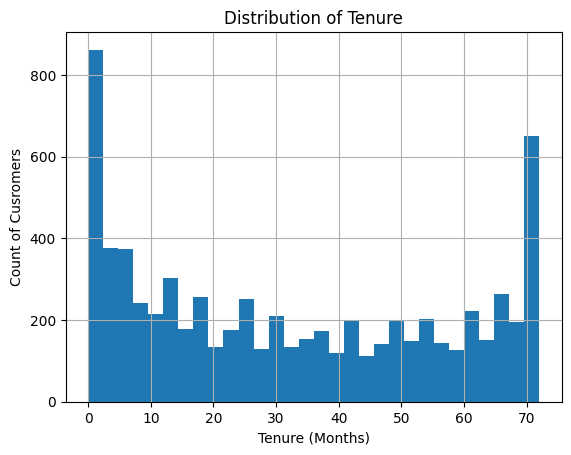

In [104]:
# Distribution of Tenure

# Visualizing how long customers stay before leaving
# Patterns in tenure typically correlate with churn 

# plotting the histogram of tenure
df['tenure'].hist(bins=30)   # pandas uses matplotlib internally for plotting
plt.title("Distribution of Tenure")  # plot title
plt.xlabel("Tenure (Months)")        # x axis label 
plt.ylabel("Count of Cusromers")     # y axis label
plt.show()


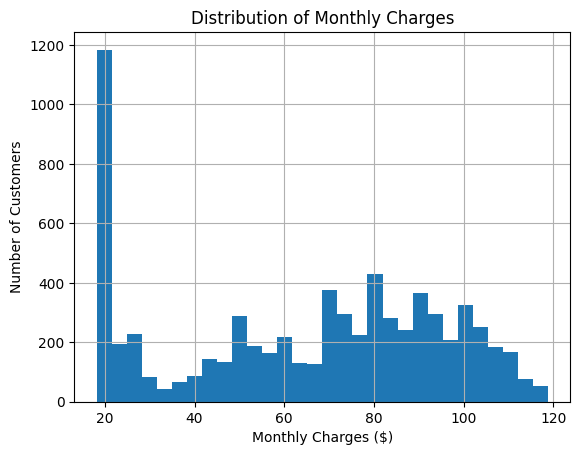

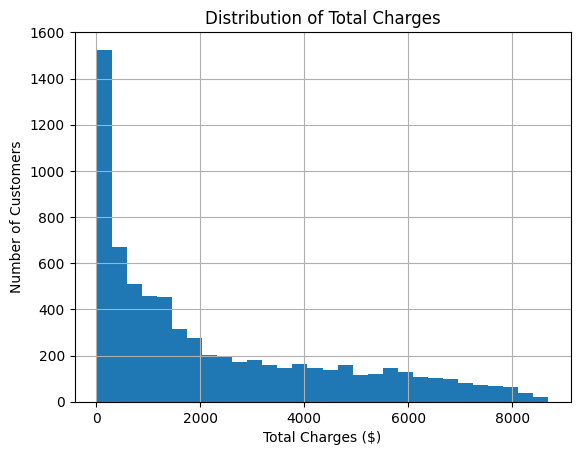

In [105]:
# Monthly Charges Distribution
# We visualize how monthly charges are distributed among customers
# Higher monthly charges correlate with higher churn

df['MonthlyCharges'].hist(bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers")
plt.show()

# Total Charges Distribution
# we visualize how total charges are distributed among customers
# TotalCharges can indicate tenure and customer value

# we convert TotalCharges to numeric in case of any non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].hist(bins=30)
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Number of Customers")
plt.show()


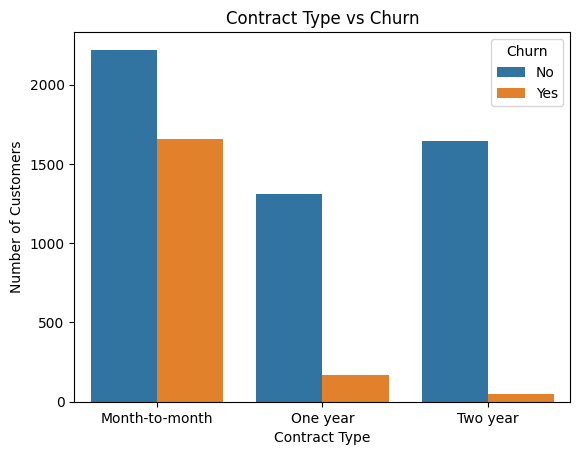

In [106]:

# Contract Type vs Churn

# We visualize how contract type relates to customer churn 
# Patterns here can help us identify which contracts have higher churn rates

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()


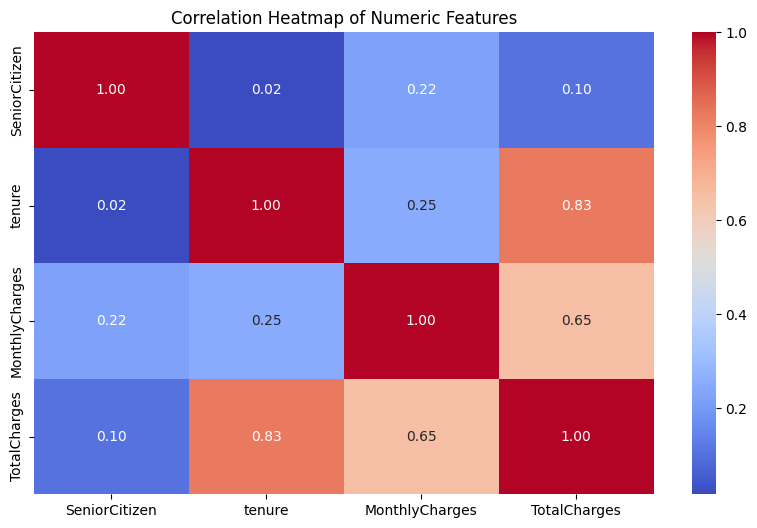

In [107]:
# Correlation Heatmap

# To see how numeric features are related to each other and to churn. 
# Strong correlations help us understand what variables might be important for prediction.

#  Compute correlation matrix for numeric columns
corr = df.corr(numeric_only=True)  
# Values range from -1 to 1: high positive , high positive = strong positive relationship , high negative = strong negative relationship

# Create a figure to control size
plt.figure(figsize=(10, 6))  

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  

# Add title for context
plt.title("Correlation Heatmap of Numeric Features")  

# Display the heatmap
plt.show()  


In [108]:
## 3. Data Preprocessing

In [109]:
# Handling missing values
# We confirm where and how many missing entries exist 
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Show total missing values in dataset
print("\nTotal missing values in dataset:", missing_values.sum())

# Handling missing values 
# Strategy:
# If a few values are missing we can drop or fill them.
# If many values are missing, we will impute with median/mode.

# Separate column types for targeted imputation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns  
cat_cols = df.select_dtypes(include=['object']).columns           

# Fill missing values
# Numerical columns - fill NaN with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())  # pandas .fillna()

# Categorical columns - fill NaN with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # pandas .mode() + .fillna()

print("\n Missing values handled. Re-check:")
print(df.isnull().sum())


Missing values per column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total missing values in dataset: 11

 Missing values handled. Re-check:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly

In [110]:
# Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder  # scikit-learn library for encoding categorical variables

# Initialize encoder 
le = LabelEncoder()

# Apply encoding to categorical columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Display encoded dataset
print("\nEncoded dataset preview:")
print(df.head())



Encoded dataset preview:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0     

In [111]:
# --- Libraries Used ---
# scikit-learn → StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler  

# --- Step 1: Select numeric columns ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns  

# --- Step 2: Initialize scaler ---
scaler = StandardScaler()

# --- Step 3: Apply scaling to numeric columns ---
df[num_cols] = scaler.fit_transform(df[num_cols])

# --- Step 4: Verify scaling ---
print("\nScaled dataset preview:")
print(df.head())



Scaled dataset preview:
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0        5375       0      -0.439916        1           0 -1.277445   
1        3962       1      -0.439916        0           0  0.066327   
2        2564       1      -0.439916        0           0 -1.236724   
3        5535       1      -0.439916        0           0  0.514251   
4        6511       0      -0.439916        0           0 -1.236724   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0       

In [112]:
## 4. Modelling 

In [113]:
# # Logistic Regression – Step 4: Modeling

# --- Libraries Used ---
# pandas → for handling dataframes (already imported)
# scikit-learn → train_test_split, LogisticRegression, and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 1: Define features (X) and target (y) ---
X = df.drop(['customerID', 'Churn'], axis=1)  # remove ID and target columns
y = df['Churn']  # target variable

# --- Step 2: Split dataset into training and testing sets ---
# 80% training, 20% testing; stratify to maintain churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 3: Initialize and train the Logistic Regression model ---
log_reg = LogisticRegression(max_iter=1000)  # ensures model converges
log_reg.fit(X_train, y_train)

# --- Step 4: Make predictions on test set ---
y_pred = log_reg.predict(X_test)

# --- Step 5: Evaluate model performance ---
# Accuracy → overall correctness
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Classification report → precision, recall, F1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix → shows true/false positives/negatives
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.7998580553584103

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[922 113]
 [169 205]]


In [114]:
# # Decision Tree Classifier –

# --- Libraries Used ---
# scikit-learn → DecisionTreeClassifier for modeling, accuracy_score, classification_report, confusion_matrix for evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 1: Initialize Decision Tree ---
dtree = DecisionTreeClassifier(random_state=42)  # random_state ensures reproducibility

# --- Step 2: Train the model ---
dtree.fit(X_train, y_train)  # X_train, y_train from previous train/test split

# --- Step 3: Make predictions on test set ---
y_pred_tree = dtree.predict(X_test)

# --- Step 4: Evaluate model performance ---
# Accuracy → overall correctness
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Classification report → precision, recall, F1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion matrix → shows true/false positives/negatives
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 0.730305180979418

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409


Confusion Matrix:
 [[835 200]
 [180 194]]


In [115]:
# Random Forest Classifier
# Used to predict customer churn using decision trees
# improving the accuracy and reducing overfitting compares to a single tree 


from sklearn.ensemble import RandomForestClassifier # for modelling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for accuracy score, classification_report, confusion_matrix for evaluation

# Initialize Random Forest 
rf = RandomForestClassifier(n_estimators=100, random_state=42)  
# n_estimators is number of trees in the forest

# train the model-
rf.fit(X_train, y_train)  # using training data

# make predictions on test set 
y_pred_rf = rf.predict(X_test)

# Evaluate model performance 

# Accuracy - overall correctness
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification report - precision, recall, F1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix - shows true/false positives/negatives
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7934705464868701

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Confusion Matrix:
 [[927 108]
 [183 191]]


In [116]:
# XGBoost Classifier 

from xgboost import XGBClassifier # for modeling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# Initialize XGBoost Classifier 
xgb_model = XGBClassifier(
    n_estimators=100,  # number of trees
    learning_rate=0.1,  # step size shrinkage
    max_depth=3,        # maximum tree depth
    random_state=42,    # ensuring reproducibility 
    use_label_encoder=False,  # suppress warnings
    eval_metric='logloss'     # evaluation metric for binary classification
)

# Train the model 
xgb_model.fit(X_train, y_train)

# Make predictions on test set 
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
# Accuracy → overall correctness
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Classification report → precision, recall, F1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix → shows true/false positives/negatives
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8055358410220014

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
 [[937  98]
 [176 198]]


c:\Users\laith\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [117]:
## 5. Model evaluation and comparison 

 Model Accuracy Comparison:
                  Model  Accuracy
0  Logistic Regression  0.799858
1        Decision Tree  0.730305
2        Random Forest  0.793471
3              XGBoost  0.805536


C:\Users\laith\AppData\Local\Temp\ipykernel_20424\3886719218.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances, y=rf_importances.index, palette='viridis')


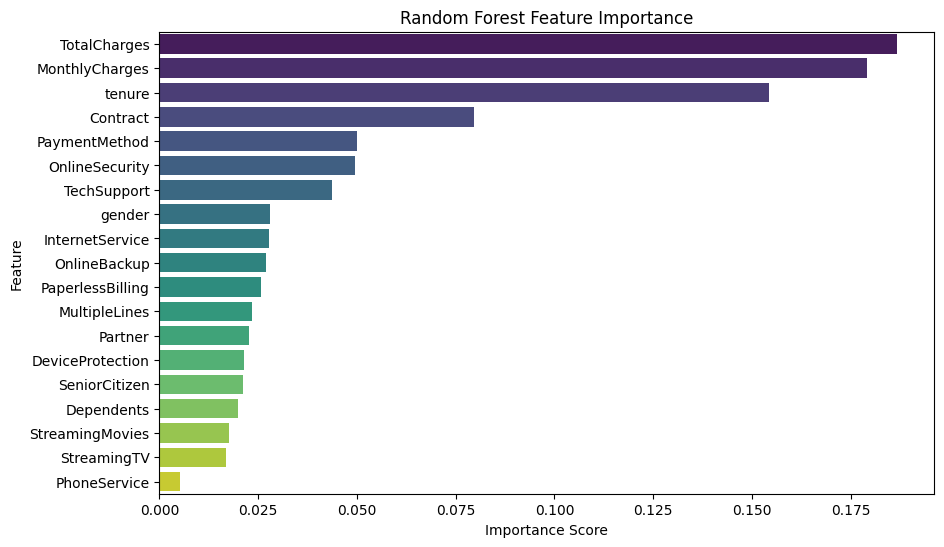

C:\Users\laith\AppData\Local\Temp\ipykernel_20424\3886719218.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances, y=xgb_importances.index, palette='magma')


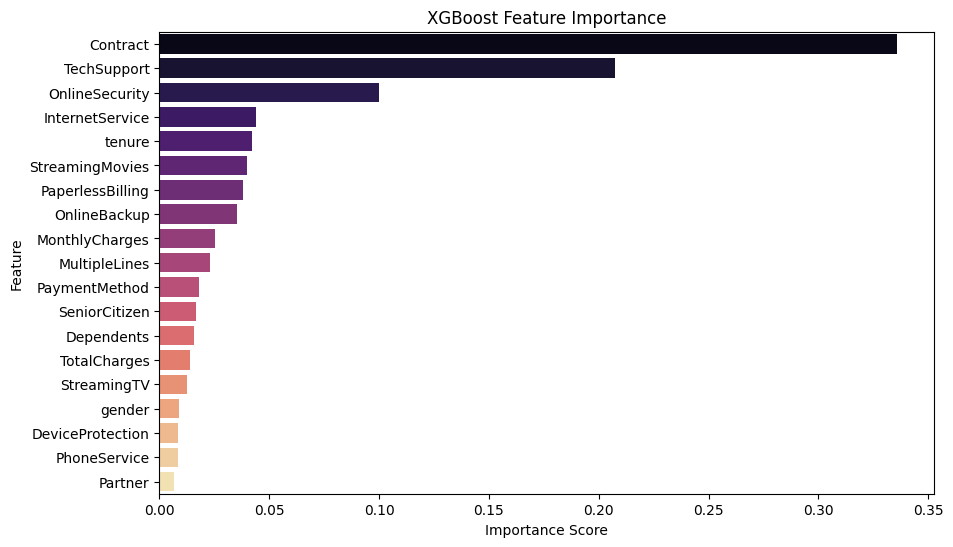

In [118]:



import pandas as pd # for organizing results
import matplotlib.pyplot as plt # for plotting feature importance
import seaborn as sns # for nicer plots

# --- Step 1: Collect model accuracies ---
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
})

print(" Model Accuracy Comparison:\n", model_results)


# Visualize Random Forest feature importance
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances, y=rf_importances.index, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Visualize XGBoost feature importance
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importances, y=xgb_importances.index, palette='magma')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
